# Ejercicio clasificación con SVM

1. Carga el conjunto de datos MNIST utilizando sklearn.datasets.load_digits().

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar el conjunto de datos MNIST
digits = load_digits()

Divide el conjunto de datos en un conjunto de entrenamiento y otro de prueba. Llamalos X_train, y_train, X_test, e y_test.  

In [3]:
# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Mostrar las formas de los conjuntos de datos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1257, 64)
X_test shape: (540, 64)
y_train shape: (1257,)
y_test shape: (540,)


Crea un transformador llamado *NormalizadorPixels* que normalice el valor de los pixeles, dicha normalización consistirá en dividir cada píxel por 255.

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

class NormalizadorPixels(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No es necesario ajustar nada en este caso, por lo que simplemente retornamos X
        return self

    def transform(self, X):
        # Normalizamos los valores de los píxeles dividiendo entre 255
        return X / 255.0

Define un Pipeline en el que se llame al anterior transformador y posteriormente se entrene un clasificador SVM utilizando sklearn.svm.SVC.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Paso 1: Crear el Pipeline
pipeline = Pipeline([
    ('normalizador', NormalizadorPixels()),  # Aplicar normalización
    ('svm', SVC())  # Clasificador SVM
])

# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Paso 3: Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Paso 4: Realizar predicciones y evaluar el modelo
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.987037037037037
Matriz de Confusión:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  1  0  0  0  1  1 56]]


Evalúa el rendimiento del clasificador en el conjunto de prueba utilizando métricas como la precisión, el recall y la matriz de confusión.

In [6]:
# Paso 5: Evaluar el rendimiento del clasificador
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del clasificador SVM:", accuracy)
print("Matriz de confusión:")
print()
print(conf_matrix)

Precisión del clasificador SVM: 0.987037037037037
Matriz de confusión:

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  1  0  0  0  1  1 56]]


Experimenta con diferentes kernels (lineal, polinomial, radial) y otros hiperparámetros de SVM para ver cómo afectan al rendimiento del modelo.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir el pipeline con el transformador y el clasificador SVM
pipeline = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC())
])

# Definir los hiperparámetros que quieres experimentar con GridSearchCV
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf'],  # Diferentes kernels
    'svm__C': [0.1, 1, 10],  # Diferentes valores de C
    'svm__degree': [2, 3],  # Solo para el kernel polinomial
    'svm__gamma': ['scale', 'auto', 0.1, 1]  # Diferentes valores de gamma
}

# Usar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el rendimiento
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con el conjunto de prueba
y_pred = grid_search.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados:
{'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.9888888888888889
Matriz de Confusión:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  1  1 57]]


Visualiza algunos ejemplos de imágenes mal clasificadas para entender en qué casos el modelo tiene dificultades.

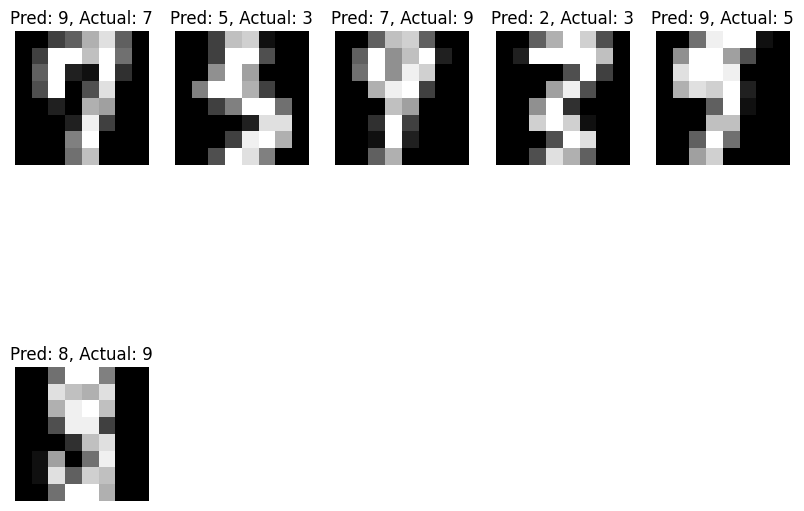

In [9]:
# Paso 6: Visualizar algunos ejemplos de imágenes mal clasificadas
misclassified_idx = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 8))

for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, Actual: {y_test[idx]}")
    plt.axis('off')
plt.show()
